In [19]:
import pandas as pd
import matplotlib.pyplot as plt

## Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named `sp500`, and `gdp`.

Instructions

- Use `merge_ordered()` to merge `gdp` and `sp500` using a left join on `year` and `date`. Save the results as `gdp_sp500`.
- Print `gdp_sp500` and look at the returns for the year 2018.
- Use `merge_ordered()`, again similar to before, to merge `gdp` and `sp500` use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable `gdp_sp500`.
- Subset the `gdp_sp500` table, select the `gdp` and `returns` columns, and save as `gdp_returns`.
- Print the correlation matrix of the `gdp_returns` table.

In [6]:
# Import the DataFrames
sp500 = pd.read_csv('SP500.csv')
gdp = pd.read_csv('gdp.csv')

In [7]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left')

# Print gdp_sp500
gdp_sp500

,Unnamed: 0,country code,year,gdp,date,returns
0,3,USA,2010,1.499210e+13,2010.0,12.78
1,7,USA,2011,1.554260e+13,2011.0,0.00
2,11,USA,2012,1.619700e+13,2012.0,13.41
3,15,USA,2012,1.619700e+13,2012.0,13.41
4,19,USA,2013,1.678480e+13,2013.0,29.60
5,23,USA,2014,1.752170e+13,2014.0,11.39
6,27,USA,2015,1.821930e+13,2015.0,-0.73
7,31,USA,2016,1.870720e+13,2016.0,9.54
8,35,USA,2017,1.948540e+13,2017.0,19.42
9,39,USA,2018,2.049410e+13,NaN,NaN


In [8]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Print gdp_sp500
gdp_sp500

,Unnamed: 0,country code,year,gdp,date,returns
0,3,USA,2010,1.499210e+13,2010,12.78
1,7,USA,2011,1.554260e+13,2011,0.00
2,11,USA,2012,1.619700e+13,2012,13.41
3,15,USA,2012,1.619700e+13,2012,13.41
4,19,USA,2013,1.678480e+13,2013,29.60
5,23,USA,2014,1.752170e+13,2014,11.39
6,27,USA,2015,1.821930e+13,2015,-0.73
7,31,USA,2016,1.870720e+13,2016,9.54
8,35,USA,2017,1.948540e+13,2017,19.42
9,39,USA,2018,2.049410e+13,2017,19.42


In [9]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp','returns']]

# Print gdp_returns correlation
gdp_returns.corr()

,gdp,returns
gdp,1.000000,0.212173
returns,0.212173,1.000000


## Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables `unemployment` and `inflation` have been loaded for you.

Instructions

- Use `merge_ordered()` to merge the `inflation` and `unemployment` tables on `date` with an inner join, and save the results as `inflation_unemploy`.
- Print the `inflation_unemploy` variable.
- Using `inflation_unemploy`, create a scatter plot with `unemployment_rate` on the horizontal axis and `cpi` (inflation) on the vertical axis.

In [10]:
# Import the DataFrames
unemployment = pd.read_csv('unemployment.csv')
inflation = pd.read_csv('inflation.csv')

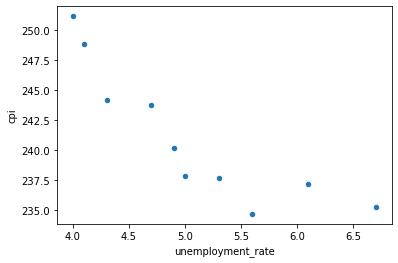

In [13]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, 
                                      on='date', how='inner')

# Print inflation_unemploy 
inflation_unemploy

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()

## merge_ordered() caution, multiple columns
When using `merge_ordered()` to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables `wb_gdp` and `wb_pop` have been loaded.

Instructions

- Use `merge_ordered()` on `gdp` and `pop`, merging on columns `date` and `country` with the fill feature, save to `ctry_date`.
- Perform the same merge of `gdp` and `pop`, but join on `country` and `date` (**reverse of step 1**) with the fill feature, saving this as `date_ctry`.

In [14]:
gdp = pd.read_csv('wb_gdp.csv')
pop = pd.read_csv('wb_pop.csv')

In [15]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date','country'], 
                             fill_method='ffill')

# Print ctry_date
ctry_date

,Unnamed: 0_x,date,country,gdp,series_code_x,Unnamed: 0_y,pop,series_code_y
0,0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,0,17065100,SP.POP.TOTL
1,16,1990-01-01,Sweden,79837.84599,NYGDPMKTPSAKD,4,8558835,SP.POP.TOTL
2,1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,4,8558835,SP.POP.TOTL
3,17,1990-04-01,Sweden,80582.28597,NYGDPMKTPSAKD,4,8558835,SP.POP.TOTL
4,2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,4,8558835,SP.POP.TOTL
5,18,1990-07-01,Sweden,79974.36017,NYGDPMKTPSAKD,4,8558835,SP.POP.TOTL
6,3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,4,8558835,SP.POP.TOTL
7,19,1990-09-01,Sweden,80106.49738,NYGDPMKTPSAKD,4,8558835,SP.POP.TOTL
8,4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,1,17284000,SP.POP.TOTL
9,20,1991-01-01,Sweden,79524.24192,NYGDPMKTPSAKD,5,8617375,SP.POP.TOTL


In [16]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['country','date'], 
                             fill_method='ffill')

# Print date_ctry
date_ctry

,Unnamed: 0_x,date,country,gdp,series_code_x,Unnamed: 0_y,pop,series_code_y
0,0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,0,17065100,SP.POP.TOTL
1,1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,0,17065100,SP.POP.TOTL
2,2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,0,17065100,SP.POP.TOTL
3,3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,0,17065100,SP.POP.TOTL
4,4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,1,17284000,SP.POP.TOTL
5,5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD,1,17284000,SP.POP.TOTL
6,6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD,1,17284000,SP.POP.TOTL
7,7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD,1,17284000,SP.POP.TOTL
8,8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD,2,17495000,SP.POP.TOTL
9,9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD,2,17495000,SP.POP.TOTL


## Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the `pandas` `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named `jpm`, `wells`, and `bac`.

Instructions

- Use `merge_asof()` to merge `jpm` (left table) and `wells` together on the `date_time` column, where the rows with the **nearest** times are matched, and with `suffixes=('', '_wells')`. Save to `jpm_wells`.
- Use `merge_asof()` to merge `jpm_wells` (left table) and `bac` together on the `date_time` column, where the rows with the closest times are matched, and with `suffixes=('_jpm', '_bac')`. Save to `jpm_wells_bac`.
- Using `price_diffs`, create a line plot of the close price of JPM, WFC, and BAC only.

In [21]:
# Import the DataFrames
jpm = pd.read_csv('jpm.csv')
wells = pd.read_csv('wells.csv')
bac = pd.read_csv('bac.csv')

In [29]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('', '_wells'), direction='nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=('_jpm', '_bac'), direction='nearest')

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()

TypeError: No matching signature found

## Using merge_asof() to create dataset
The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given `gdp`, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table `recession` has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use `merge_asof()` to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables `gdp_80s` and `recession` have been loaded for you.

Instructions

- Using `merge_asof()`, merge `gdp` and `recession` on date, with `gdp` as the left table. Save to the variable `gdp_recession`.
- Create a `list` using a list comprehension and a conditional expression, named `is_recession`, where for each row if the `gdp_recession['econ_status']` value is equal to 'recession' then enter `'r'` else `'g'`.
- Using `gdp_recession`, plot a bar chart of `gdp` versus `date`, setting the `color` argument equal to `is_recession`.

In [34]:
# Import the DataFrames
gdp_80s = pd.read_csv('gdp_80s.csv')
recession = pd.read_csv('recession.csv')

In [36]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
#is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
#gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
#plt.show()

ValueError: left keys must be sorted

## merge_asof() and merge_ordered() differences
The `merge_asof()` and `merge_ordered()` functions are similar in the type of merge they perform and the input arguments they use. In this exercise, think about how the functions are different.

Instructions

- Drag and drop the statement into the appropriate box for either the `merge_asof()` function, the `merge_ordered()` function, or both if it applies to both functions.

merge_asof()
- Has an argument that can be set to `forward` to select the first row in the right table whose key column is greater than or equal to the left's.
- It can be used to do fuzzy matching of dates between tables.
- After matching two tables, if there are missing values at the top of the table from the right table, this function can fill them in.

both
- This function can set the suffix for overlapping column names.
- This function can be used when working with ordered or time-series data.

.merge_ordered
- It allows for a right join during the merge.
- If it cannot match the rows of the tables exactly, it can use forward fill to interpolate the missing data.

## Explore financials with .query()
You have been given a table of financial data from some popular social network companies called `social_fin`. All of the values are in thousands of US dollars.

Use the `.query()` method and the console to explore `social_fin` and select the True statement.

In [39]:
# Import the DataFrame
social_fin = pd.read_csv('social_fin.csv')

R:
There are 6 rows where the net income has a negative value.

## Subsetting rows with .query()
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the `.query()` method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the `.query()` method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables `wb_gdp` and `wb_pop` have been loaded for you.

Instructions

- Use `merge_ordered()` on `wb_gdp` and `wb_pop` on columns `country` and `date` with the fill feature, save to `gdp_pop` and print.
- Add a column named `gdp_per_capita` to `gdp_pop` that divides `gdp` by `pop`.
- Pivot `gdp_pop` so `values='gdp_per_capita'`, `index='date'`, and `columns='country'`, save as `gdp_pivot`.
- Use `.query()` to select rows from `gdp_pivot` where `date` is greater than equal to `1991-01-01`. Save as `recent_gdp_pop`.

In [40]:
# Import the DataFrame
wb_gdp = pd.read_csv('wb_gdp.csv')
wb_pop = pd.read_csv('wb_pop.csv')

In [41]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(wb_gdp, wb_pop, on=['country','date'], fill_method='ffill')

In [42]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

In [43]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

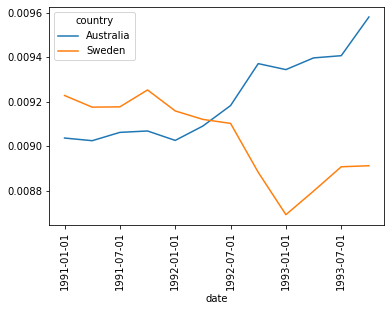

In [44]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

## Select the right .melt() arguments
You are given a table named `inflation_bcfi`. Chose the option to get the **same** output as the table below.
```
   country    indicator  year  annual
0   Brazil  Inflation %  2017    3.45
1   Canada  Inflation %  2017    1.60
2   France  Inflation %  2017    1.03
3    India  Inflation %  2017    2.49
4   Brazil  Inflation %  2018    3.66
5   Canada  Inflation %  2018    2.27
6   France  Inflation %  2018    1.85
7    India  Inflation %  2018    4.86
8   Brazil  Inflation %  2019    3.73
9   Canada  Inflation %  2019    1.95
10  France  Inflation %  2019    1.11
11   India  Inflation %  2019    7.66
```

In [45]:
# Import the DatFrame
inflation_bcfi = pd.read_csv('inflation_bcfi.csv')

In [47]:
inflation_bcfi.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')

,country,indicator,year,annual
0,Brazil,Inflation %,Unnamed: 0,0.00
1,Canada,Inflation %,Unnamed: 0,1.00
2,France,Inflation %,Unnamed: 0,2.00
3,India,Inflation %,Unnamed: 0,3.00
4,Brazil,Inflation %,2017,3.45
5,Canada,Inflation %,2017,1.60
6,France,Inflation %,2017,1.03
7,India,Inflation %,2017,2.49
8,Brazil,Inflation %,2018,3.66
9,Canada,Inflation %,2018,2.27


## Using .melt() to reshape government data
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using `.melt()`. You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called `ur_wide`. You are encouraged to view the table in the console before beginning the exercise.

Instructions

- Use `.melt()` to unpivot all of the columns of `ur_wide` except `year` and ensure that the columns with the months and values are named `month` and `unempl_rate`, respectively. Save the result as `ur_tall`.
- Add a column to `ur_tall` named `date` which combines the `year` and `month` columns as year-month format into a larger string, and converts it to a date data type.
- Sort `ur_tall` by date and save as `ur_sorted`.
- Using `ur_sorted`, plot `unempl_rate` on the y-axis and `date` on the x-axis.

In [48]:
# Import the DataFrame
ur_wide = pd.read_csv('ur_wide.csv')

In [49]:
# Unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', 
                       value_name='unempl_rate')

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

TypeError: can only concatenate str (not "int") to str

## Using .melt() for stocks vs bond performance
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the `.melt()` method to reshape this table.

Additionally, you will use the `.query()` method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables `ten_yr` and `dji` have been loaded for you.

Instructions

- Use `.melt()` on `ten_yr` to unpivot everything except the `metric` column, setting `var_name='date'` and `value_name='close'`. Save the result to `bond_perc`.
- Using the `.query()` method, select only those rows were `metric` equals 'close', and save to `bond_perc_close`.
- Use `merge_ordered()` to merge `dji` (left table) and `bond_perc_close` on `date` with an inner join, and set `suffixes` equal to `('_dow', '_bond')`. Save the result to `dow_bond`.
- Using `dow_bond`, plot only the Dow and bond values.

In [ ]:
# Import the DataFrames
ten_yr = pd.read_csv('ten_yr.csv')
dji = pd.read_csv('dji.csv')

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', 
                            suffixes=('_dow', '_bond'), how='inner')

# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()